In [1]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [7]:
## split dataset based on independent and dependent features

X = df
y = dataset['target']

In [10]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [12]:
# check for missing values
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
16,-0.005515,-0.044642,0.042296,0.049415,0.024574,-0.023861,0.074412,-0.039493,0.052277,0.027917
408,0.063504,-0.044642,-0.050396,0.107944,0.031454,0.019354,-0.017629,0.023608,0.058038,0.040343
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362


In [13]:
## correlation

X.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


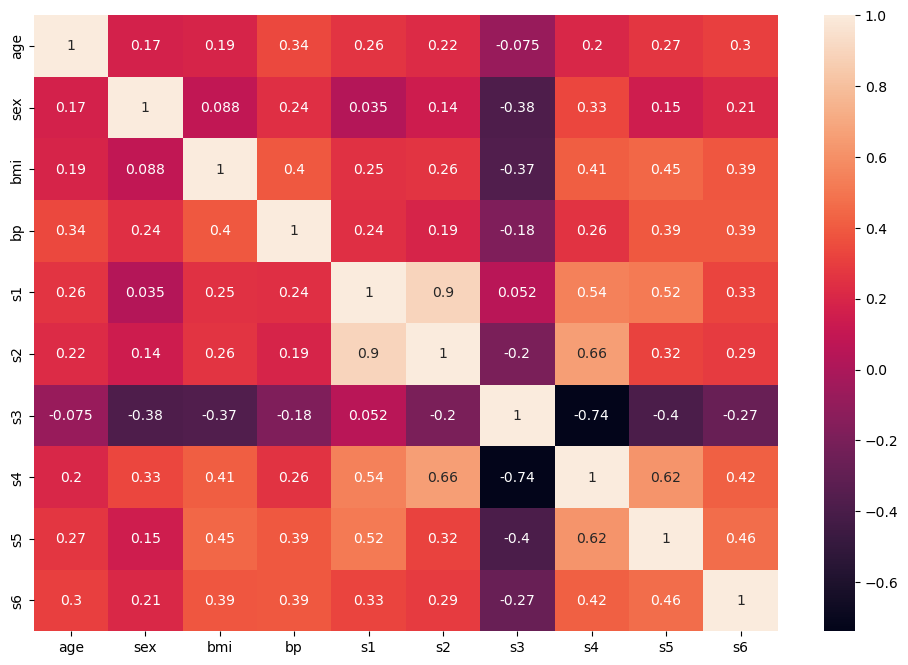

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [18]:
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [19]:
regressor = DecisionTreeRegressor()

In [20]:
grid = GridSearchCV(regressor, param_grid=params, scoring='neg_mean_squared_error', cv=5)

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
%%time
grid.fit(X_train,y_train)

CPU times: total: 1.78 s
Wall time: 2.31 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [23]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [24]:
y_predict = grid.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [26]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.32848543130069174
46.6736818873054
3713.267259681821


In [27]:
DT_opt = DecisionTreeRegressor(criterion='squared_error',max_depth= 3,
 max_features='log2',
 splitter='best')

In [28]:
DT_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2')

[Text(0.5, 0.875, 's4 <= -0.005\nsquared_error = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.25, 0.625, 'age <= -0.018\nsquared_error = 3959.191\nsamples = 135\nvalue = 116.215'),
 Text(0.125, 0.375, 'bmi <= 0.008\nsquared_error = 3354.801\nsamples = 58\nvalue = 102.483'),
 Text(0.0625, 0.125, 'squared_error = 2028.613\nsamples = 47\nvalue = 90.064'),
 Text(0.1875, 0.125, 'squared_error = 5546.612\nsamples = 11\nvalue = 155.545'),
 Text(0.375, 0.375, 's5 <= 0.007\nsquared_error = 4165.415\nsamples = 77\nvalue = 126.558'),
 Text(0.3125, 0.125, 'squared_error = 3009.106\nsamples = 60\nvalue = 109.167'),
 Text(0.4375, 0.125, 'squared_error = 3411.114\nsamples = 17\nvalue = 187.941'),
 Text(0.75, 0.625, 'bmi <= -0.001\nsquared_error = 5789.902\nsamples = 196\nvalue = 180.607'),
 Text(0.625, 0.375, 's4 <= 0.031\nsquared_error = 3848.988\nsamples = 76\nvalue = 133.342'),
 Text(0.5625, 0.125, 'squared_error = 2689.555\nsamples = 44\nvalue = 111.614'),
 Text(0.6875, 0.125, 'squared_err

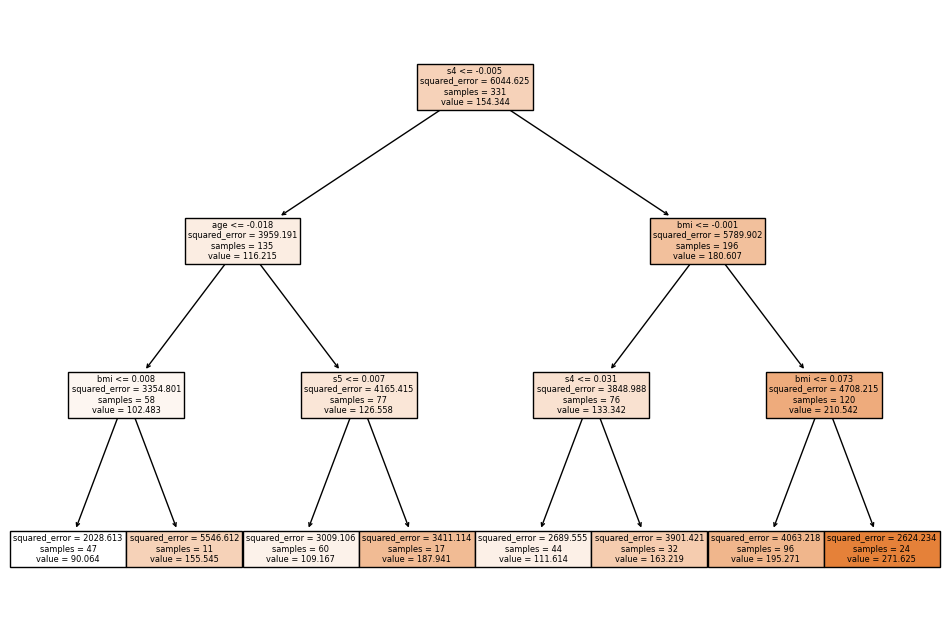

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(DT_opt,filled=True, feature_names=X.columns)